# Logistic Regression - Simple Data

In [41]:
import pandas as pd
import datetime
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('./../../data/data.csv')

In [3]:
df.columns

Index(['index', 'id', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'currency',
       'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'category', 'spotlight', 'source_url', 'name_len',
       'name_len_clean', 'blurb_len', 'blurb_len_clean'],
      dtype='object')

## Preprocessing

In [8]:
df = df[df['state'].isin(['successful', 'failed'])]
df = df.replace(['successful', 'failed'], [1,0])

In [4]:
# Drop non-relevant columns
drop_columns = ['index', 'id', 'name', 'blurb', 'pledged', 'slug', 'usd_pledged', 'source_url']
df.drop(drop_columns, axis=1, inplace=True)

In [10]:
onehot_columns = ['country', 'currency', 'category']
for column in onehot_columns:
    onehot_array = pd.get_dummies(df[[column]], prefix=column, drop_first=True)
    df = pd.concat([df, onehot_array], axis=1)
    df.drop(column, axis=1, inplace=True)

In [15]:
df[['created_at', 'launched_at', 'state_changed_at', 'deadline']] = df[['created_at', 'launched_at', 'state_changed_at', 'deadline']].apply(pd.to_datetime)

In [16]:
df['created_to_launch'] = df['launched_at'] - df['created_at']
df['launch_to_deadline'] = df['deadline'] - df['launched_at']
df['state_change_to_deadline'] = df['deadline'] - df['state_changed_at']

In [17]:
df.drop(['created_at', 'launched_at', 'state_changed_at', 'deadline'], axis=1, inplace=True)

In [25]:
df['created_to_launch'] = df['created_to_launch'] / datetime.timedelta(days=1)
df['launch_to_deadline'] = df['launch_to_deadline'] / datetime.timedelta(days=1)
df['state_change_to_deadline'] = df['state_change_to_deadline'] / datetime.timedelta(days=1)

In [29]:
bool_cols = ['disable_communication', 'currency_trailing_code', 'staff_pick', 'spotlight']
df[bool_cols] = df[bool_cols].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17434 entries, 0 to 20631
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   goal                      17434 non-null  float64
 1   state                     17434 non-null  int64  
 2   disable_communication     17434 non-null  int64  
 3   currency_trailing_code    17434 non-null  int64  
 4   staff_pick                17434 non-null  int64  
 5   backers_count             17434 non-null  int64  
 6   static_usd_rate           17434 non-null  float64
 7   spotlight                 17434 non-null  int64  
 8   name_len                  17434 non-null  float64
 9   name_len_clean            17434 non-null  float64
 10  blurb_len                 17434 non-null  float64
 11  blurb_len_clean           17434 non-null  float64
 12  country_AU                17434 non-null  uint8  
 13  country_BE                17434 non-null  uint8  
 14  countr

## Modelling

### Statsmodel Logistic Regression

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('state', axis=1), df['state'], test_size=0.2, random_state=42)

In [35]:
X_train

,goal,disable_communication,currency_trailing_code,staff_pick,backers_count,static_usd_rate,spotlight,name_len,name_len_clean,blurb_len,...,category_Software,category_Sound,category_Spaces,category_Thrillers,category_Wearables,category_Web,category_Webseries,created_to_launch,launch_to_deadline,state_change_to_deadline
13524,60000.0,0,0,0,821,1.633312,1,8.0,7.0,21.0,...,0,0,0,0,0,0,0,38.000694,40.166667,0.0
1687,850.0,0,0,0,23,1.440551,1,7.0,6.0,17.0,...,0,0,0,0,0,0,0,377.159722,20.000000,0.0
18875,3000.0,0,1,1,34,1.000000,0,9.0,6.0,21.0,...,0,0,0,0,0,0,0,234.793056,32.000000,0.0
787,100000.0,0,1,0,0,1.000000,0,1.0,1.0,24.0,...,0,0,0,0,0,0,0,-113.772222,30.000000,0.0
13254,38000.0,0,1,0,1219,1.000000,1,10.0,10.0,24.0,...,0,0,0,0,0,0,0,14.532639,-110.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13208,7500.0,0,0,0,388,1.096019,1,8.0,8.0,23.0,...,0,0,0,0,0,0,0,186.037500,60.000000,0.0
13888,120000.0,0,0,0,60,1.107972,0,7.0,6.0,22.0,...,0,0,0,0,0,0,0,-121.177083,1.000000,0.0
5846,1000.0,0,1,0,1,1.000000,0,4.0,4.0,4.0,...,0,0,0,0,0,1,0,4.723611,56.269444,0.0
942,15000.0,0,1,0,0,1.000000,0,6.0,4.0,20.0,...,0,0,0,0,0,1,0,212.081250,45.918750,0.0


In [39]:
logreg = sm.Logit(y_train, X_train).fit(method='bfgs')

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3


/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                  state   No. Observations:                13947
Model:                          Logit   Df Residuals:                    13892
Method:                           MLE   Df Model:                           54
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                -0.07359
Time:                        19:12:02   Log-Likelihood:                -9667.3
converged:                      False   LL-Null:                       -9004.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
goal                              0        nan        nan        nan         nan         nan
disable_communication             0        nan        nan        nan         nan         

### Scikit Learn Logistic Regression

In [42]:
logreg_clf = LogisticRegression(penalty='none', random_state=0).fit(X_train, y_train)

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
logreg_clf.score(X_test, y_test)

0.8872956696300545

<AxesSubplot: >

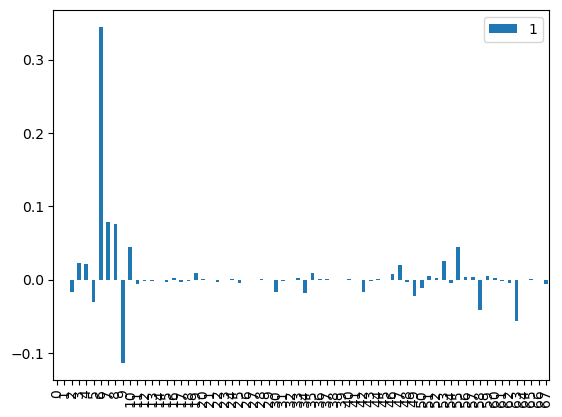

In [55]:
pd.DataFrame([X_train.columns, logreg_clf.coef_[0]]).T.plot.bar()